## Jevitt

In [ ]:
import scanpy as sc

adata = sc.read_loom("C:\\Users\\unite\\Documents\\tese\\home\\rusty_lizard\\Tese\\Datasets\\literature\\Jevitt\\GSM4363298_7053cells_highquality_ovary.loom")

# Save as H5AD
adata.write("C:\\Users\\unite\\Documents\\tese\\home\\rusty_lizard\\tese\\datasets\\literature\\Jevitt\\jevitt.h5ad")


## All dataset label extraction

In [1]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

random.seed(17)
np.random.seed(17)

In [ ]:
adata_jevitt = sc.read_h5ad(".\\tese\\datasets\\literature\\Jevitt\\jevitt.h5ad")
adata_slaidina = sc.read_h5ad(".\\tese\\datasets\\literature\\Slaidina\\raw_desintegrated_Slaidina.h5ad")
adata_rust = sc.read_h5ad(".\\tese\\datasets\\literature\\Rust\\rust.h5ad")
adata_FCA = sc.read_h5ad(".\\tese\\datasets\\literature\\FCA\\raw_FCA_annotated.h5ad")

In [3]:
adata_jevitt.obs["orig_ident"]
adata_slaidina.obs["sample"]
adata_rust.obs["dataset"]
adata_FCA.obs["fca_id"]

AAACCCAAGTTTCAGC-6e949598__FCA62_Female_ovary_adult_5dWT_Nystul_All_Nuclei    FCA62
AAACCCACAAGCACAG-6e949598__FCA62_Female_ovary_adult_5dWT_Nystul_All_Nuclei    FCA62
AAACCCACACTGCTTC-6e949598__FCA62_Female_ovary_adult_5dWT_Nystul_All_Nuclei    FCA62
AAACCCACAGTGGGTA-6e949598__FCA62_Female_ovary_adult_5dWT_Nystul_All_Nuclei    FCA62
AAACCCAGTAACTAAG-6e949598__FCA62_Female_ovary_adult_5dWT_Nystul_All_Nuclei    FCA62
                                                                              ...  
TTTGTTGGTAGCTGTT-6ea3ec82__FCA63_Female_ovary_adult_5dWT_Nystul_Big_Nuclei    FCA63
TTTGTTGGTTCAGCTA-6ea3ec82__FCA63_Female_ovary_adult_5dWT_Nystul_Big_Nuclei    FCA63
TTTGTTGTCACACGAT-6ea3ec82__FCA63_Female_ovary_adult_5dWT_Nystul_Big_Nuclei    FCA63
TTTGTTGTCCGAACGC-6ea3ec82__FCA63_Female_ovary_adult_5dWT_Nystul_Big_Nuclei    FCA63
TTTGTTGTCGATACGT-6ea3ec82__FCA63_Female_ovary_adult_5dWT_Nystul_Big_Nuclei    FCA63
Name: fca_id, Length: 31401, dtype: category
Categories (2, object): ['FCA62

### Integration

#### setup

In [32]:
adata_slaidina.X[1:10,1:10].todense()

matrix([[0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 1., 0., 0., 1.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 2., 0., 0., 1.],
        [0., 0., 0., 0., 0., 2., 0., 0., 0.],
        [0., 0., 0., 0., 1., 1., 0., 0., 1.]])

In [33]:
adata_slaidina

AnnData object with n_obs × n_vars = 15138 × 12729
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'sample', 'percent.mt', 'integrated_snn_res.1', 'seurat_clusters', 'integrated_snn_res.0.2', 'integrated_snn_res.0.6', 'label', 'integrated_snn_res.0.35', 'integrated_snn_res.0.25', 'integrated_snn_res.0.8'
    var: 'name'

In [ ]:
import scanpy as sc

adata_jevitt.obs["batch"] = adata_jevitt.obs["orig_ident"]
adata_slaidina.obs["batch"] = adata_slaidina.obs["sample"]
adata_rust.obs["batch"]   = adata_rust.obs["dataset"]
adata_FCA.obs["batch"]    = adata_FCA.obs["fca_id"]

adata_FCA = adata_FCA[adata_FCA.obs["label"] != "FCA_artefact"]
adata_FCA = adata_FCA[adata_FCA.obs["label"] != "FCA_n.a. (missing in cleanup)"]


adata_FCA.obs["label"] = adata_FCA.obs["label"].cat.add_categories([
    "MB St1-6-like cells (uncertain identity)"
])

adata_FCA.obs["label"] = adata_FCA.obs["label"].mask(
    adata_FCA.obs["label"].str.contains("MB St1-6") & 
    adata_FCA.obs["label"].str.contains("don't think it's MB"),
    "MB St1-6-like cells (uncertain identity)"
)
adata_FCA.obs["label"] = adata_FCA.obs["label"].cat.remove_unused_categories()


In [ ]:
harmonized_labels = {
                    #Jevitt defines their early germline "1. Germline Cluster 1" as Region 1 germarium germ cells
                    #Rust mentions undifferentiated germline "4.0 undif. germ cell" as pre-Region 3 germ cells as per Xie and Spradling; Margolis and Spradling
    
                    "Early Germline (GSC-germarium_R2b)": ["1. Germline Cluster 1", "GC_GSC/CB/2-cc", "GC_4-cc", "GC_8-cc", "GC_16-cc 2a I", "GC_16-cc 2a II", 'FCA_young germ cell',
                                                             "GC_16-cc 2ab", "GC_16-cc 2b", "4.0 GSC", "4.0 undif. germ cell", "FCA_young germ cells", 'FCA_post-mitotic germ cells, early 16-cell cyst'], 
                    "Older Germline (germarium_R3-maturity)": ["2. Germline Cluster 2", "GC_16-cc 3", "GC_St2", "4.1 older germ cell", 'FCA_post-mitotic nurse cells; endocycling'],
                    
                    #Sadly, yet understandably, Jevitt does not provide a detailed breakdown of germarium somatic cells
                    #Moreover, since germarium somatic cells are less represented, final labels would generate wildly unbalanced classes
                    #Therefore, germarium somatic cells will be grouped together as "Germarium Somatic Cells"

                    "Germarium Somatic Cells": ["3. Somatic Cells in the Germarium", "germarium_cEC", "germarium_aEC", "germarium_aEC", "germarium_TF/CC",
                                                 "3.1.2.1 TF", "3.1.2.0 ant. EC", "3.1.1 cent. EC", "3.1.0 post. EC",'CSantos_Terminal filament/escort cells',
                                                 'FCA_escort cell'],
                    
                    #Slaidina's label "germarium_polar" will be discarded in the final labelling, as other datasets do not specify to which stage their polar cells belong.

                    "Polar Cells, Stalk Cells and Cap cells": ["4. Polar Cells", "3.2.1 polar cell", 'CSantos_Stalk cells/cap cells and polar cells', "3.1.2.1 cap cell",
                                                                "5. Stalk Cells", "germarium_pre-stalk", "germarium_stalk", "3.2.0 stalk cell", 'FCA_stalk follicle cell'],
                    
                    
                    #"(pre)Stalk Cells": ["5. Stalk Cells", "germarium_pre-stalk", "germarium_stalk", "3.2.0 stalk cell"],
                    "Follicle Stem Cells/pre-Follicle Cells": ["6. FSC/pre-Follicle Cells", "germarium_FSC/pre-FC", "3.0.1 FSC", "3.0.1 early pFC", "3.0.0 late pFC"],

                    #Jevitt state that at st6 symmetry starts to break, i.e. transition to vitellogenesis occurs. Before st6, cell polarity will be ignored for labelling purposes.
                    
                    #Rust and Slaidina, enter into great detail regarding the different populations of cells regarding polarity starting from st6.
                    #When possible, their insights will be considered in the labelling process.

                    #According to the different schematics in the three papers, the different labels can compared and mapped as follows (from st6), when applicable:
                    #Jevitt PFCs = Slaidina PT = Rust post.
                    #Jevitt MBFCs = Slaidina MB = Rust cent.
                    #Jevitt SCs = Slaidina AT = Rust stretch cells (SCs) or ant.

                    #For the sake of our analysis, our labels shall more closely resemble Slaidina's nomenclature.
                    
                    "Follicle Cells (Pre-Vitellogenesis: st1-6)": ["7. Mitotic Follicle Cells (Stg. 1-5)", "22. Terminal Follicle Cells", "FC_St2-4 I", "FC_St2-4 II",
                                                                    "CSantos_MB St1-6-like cells (uncertain identity)", "FC_PT St4-5",
                                                                     "0 MB 2-5","2.3.0 post. MB 5-6", "FC_MB St5-6", "FC_AT St5-6", "1 ant./cent. MB 5-6", "CSantos_MB St1-6",
                                                                     'FCA_main body follicle cell (FBbt:00005402) ca. until St.5'],

                    # As stages 5-7 are  hard to cluster discretely, representing a transitional phase, we will instead consider the following labels:                      

                    #"Follicle Posterior Cells (st5-6)": ["2.3.0 post. MB 5-6"],
                    #"Follicle Anterior and Main Body Cells (st5-6)": ["FC_MB St5-6", "FC_AT St5-6", "1 ant./cent. MB 5-6"],
                    
                    #Jevitt's dataset, due to having a more limited number of cells, does not have the same level of granularity as Slaidina and Rust.
                    #Therefore, the following labels will be discarded in the final labelling:
                    #Jevitt's label "8. Post-Mitotic Follicle Cells (Stg. 6-8)" will be discarded while still considering the st6-8 cells.
                    #Jevitt's labels "24-26. Stretched Cells 1-3" will be discarded while still considering the stretched cells in the datasets.
                    #Jevitt's label "22. Terminal Follicle Cells" will be discarded while still considering the anterior cells in the datasets.

                    #The alternative would be to merge said labels with the many labels for those stages in the other datasets, which would be:
                    #1. Less informative, losing discriminative power regarding polarity and 2. Possibly lead to a class imbalance problem.
                    #These cells will remain unlabelled in the final dataset, as scanvi is able to handle unlabelled cells and even predict their labels.
                    
                    
                    "Follicle Posterior Cells (st6-7)": ["FC_PT St6", "FC_PT St7", "2.3.1 post. MB 7"],
                    "Follicle Main Body Cells (st6-7)": ["FC_MB St6", "2.0 cent. MB 6-7", 'FCA_central main body follicle cells ca. St. 6-8'],
                    "Follicle Anterior Cells (st6-7)":["FC_AT St7", "2.1.0 stretch cell 6-7"], 

                    
                    "Follicle Posterior Cells (st7-10A)": ["FC_PT St8 I", "FC_PT St8 II", "2.2.3 post. MB 8", "FC_PT St9", "2.2.1 post. MB 9"],
                    "Follicle Main Body Cells (st7-10A)": ["FC_PT St8 I", "FC_PT St8 II", "2.2.3 post. MB 8", "11. Vitellogenic MBFCs (Stg. 8) 3", "8. Vitellogenic MBFCs (Stg. 8) 2", "12. Vitellogenic MBFCs (Stg. 8) 4",
                                                            "7. Vitellogenic MBFCs (Stg. 8) 1", "FC_MB St8", "2.2.0 cent. MB 8""13. Vitellogenic MBFCs (Stg. 9-10A) 1", "FC_MB St9", "2.2.2 cent. MB 9",
                                                            "15. Vitellogenic MBFCs (Stg. 9-10A) 3", "14. Vitellogenic MBFCs (Stg. 9-10A) 2", "2.2.1 MB 9+", 'CSantos_MB St10A', 'CSantos_MB St7-10'],
                    "Follicle Anterior Cells (st7-10A)": ["FC_AT St8", "2.1.1 stretch cell 8", "FC_AT St8-9", "2.1.1 stretch cell 8+"],
                    
                    # "Follicle Posterior Cells (st8)": ["FC_PT St8 I", "FC_PT St8 II", "2.2.3 post. MB 8"],
                    # "Follicle Main Body Cells (st8)": ["11. Vitellogenic MBFCs (Stg. 8) 3", "8. Vitellogenic MBFCs (Stg. 8) 2", "12. Vitellogenic MBFCs (Stg. 8) 4",
                    #                                    "7. Vitellogenic MBFCs (Stg. 8) 1", "FC_MB St8", "2.2.0 cent. MB 8"],
                    # "Follicle Anterior Cells (st8)": ["FC_AT St8", "2.1.1 stretch cell 8"],

                    # "Follicle Main Body Cells (st8-9)": ["FC_MB St8-9", "2.2.2 cent. MB 9"],
                    # "Follicle Anterior Cells (st8-9)": ["FC_AT St8-9", "2.1.1 stretch cell 8+"],

                    # "Follicle Posterior Cells (st9)": ["FC_PT St9", "2.2.1 post. MB 9"],
                    # "Follicle Main Body Cells (st9-10A)": ["13. Vitellogenic MBFCs (Stg. 9-10A) 1", "FC_MB St9", "2.2.2 cent. MB 9", "15. Vitellogenic MBFCs (Stg. 9-10A) 3",
                    #                                        "14. Vitellogenic MBFCs (Stg. 9-10A) 2"],
                    
                  
                    "Follicle Main Body Cells (st10B-11)": ["16. Choriogenic MBFCs (Stg. 10B)",'CSantos_MB St10B-11', "17. Choriogenic MBFCs (Stg. 11)"],
                    "Follicle Main Body Cells (st12-14)": ["18. Choriogenic MBFCs (Stg. 12)", 'CSantos_MB St12-14'],
                    "Follicle Main Body Cells (st14)": ["19. Choriogenic MBFCs (Stg. 14) 1", "20. Choriogenic MBFCs (Stg. 14) 2", 
                                                        #"CSantos_St14 FCs - stretch (Mmp2) and MB (Mmp2)",
                                                         'CSantos_St14 FCs - stretch (Mmp2) and MB (Mmp2 + Ilp8)'],

                    "Dorsal Appendage-forming Follicle Cells": ["17. Dorsal Appendage Forming Follicle Cells",
                                                                 'CSantos_Dorsal appendage forming cells?', # originally "Dorsal appendage forming cells (uncertain)" later reverted to "Dorsal appendage forming cells?"
                                                                 'CSantos_Terminal corpus luteum/dorsal appendage forming cells (Mmp2)'],



                    "Centripetal and Border Cells": ["23. Centripetal and Border Cells", "2.1.0 border cell"],

                    "Anterior-derived Corpus Luteum Cells": ["27. Terminal Corpus Luteum Cells 1"], #insight from Jevitt's dataset's "CellType" column
                    "Main Body-derived Corpus Luteum Cells": ["21. Main Body-Derived Corpus Luteum Cells", 'CSantos_MB derived corpus luteum (Ilp8)'],
                    "Posterior-derived Corpus Luteum Cells": ["28. Terminal Corpus Luteum Cells 2"], #insight from Jevitt's dataset's "CellType" column

                    "Muscle Cells": ["29. Muscle Sheath Cells", "5 muscle cell", 'FCA_ovarian sheath muscle'],
                    "Adipocytes": ["31. Adipocytes"],
                    "Oviduct Cells": ["30. Oviduct Cells", 'CSantos_Oviduct (Abd-A)','CSantos_Oviduct (Ance)', 'FCA_oviduct'],
                    "Hemocytes": ["32. Hemocytes", "2.2.2 hemocyte"],
                    "Trachea": ['FCA_adult trachea cell']
                     }
    


In [ ]:
import pandas as pd

def map_to_harmonized(label, harmonized_dict):
    if pd.isna(label):
        return "unlabeled"
    for new_label, old_labels in harmonized_dict.items():
        if label in old_labels:
            return new_label
    return "unlabeled"

datasets = [
    (adata_jevitt, "ClusterName"),
    (adata_slaidina, "label"),
    (adata_rust, "label"),
    (adata_FCA, "label")
]

for ad, label_col in datasets:
    ad.obs["cell_type"] = [map_to_harmonized(lbl, harmonized_labels) for lbl in ad.obs[label_col]]


C:\Users\unite\AppData\Local\Temp\ipykernel_23316\3578032139.py:22: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  ad.obs["cell_type"] = [map_to_harmonized(lbl, harmonized_labels) for lbl in ad.obs[label_col]]


In [ ]:
adata_combined = sc.concat(
    [adata_jevitt, adata_slaidina, adata_rust
     , adata_FCA
     ],
    join='outer',          
    label='source',        
    keys=["jevitt", "slaidina", "rust"
          , "FCA"
          ]  
)

technology_map = {
    "jevitt": "scRNA-seq",
    "slaidina": "scRNA-seq",
    "rust": "scRNA-seq"
    ,"FCA": "snRNA-seq"
}
adata_combined.obs["technology"] = adata_combined.obs["source"].map(technology_map)

adata_combined.write_h5ad('C:\\Users\\unite\\Documents\\tese\\home\\rusty_lizard\\Tese\\Datasets\\literature\\combined_dataset.h5ad')

#### harmony

In [ ]:
from scanpy.external.pp import harmony_integrate
import random

adata_combined.layers["counts"] = adata_combined.X
sc.pp.highly_variable_genes(
    adata_combined, flavor= "seurat_v3",
    n_top_genes=2000,
    layer="counts",
    batch_key="batch",
    subset=True,
)
sc.pp.log1p(adata_combined)
sc.pp.pca(adata_combined, n_comps=50)


2025-05-10 16:26:19,075 - harmonypy - INFO - Computing initial centroids with sklearn.KMeans...
2025-05-10 16:26:22,232 - harmonypy - INFO - sklearn.KMeans initialization complete.
2025-05-10 16:26:22,391 - harmonypy - INFO - Iteration 1 of 10
2025-05-10 16:26:31,570 - harmonypy - INFO - Iteration 2 of 10
2025-05-10 16:26:41,000 - harmonypy - INFO - Iteration 3 of 10
2025-05-10 16:26:50,058 - harmonypy - INFO - Iteration 4 of 10
2025-05-10 16:26:59,478 - harmonypy - INFO - Converged after 4 iterations
c:\Users\unite\miniconda3\envs\label_harmony\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


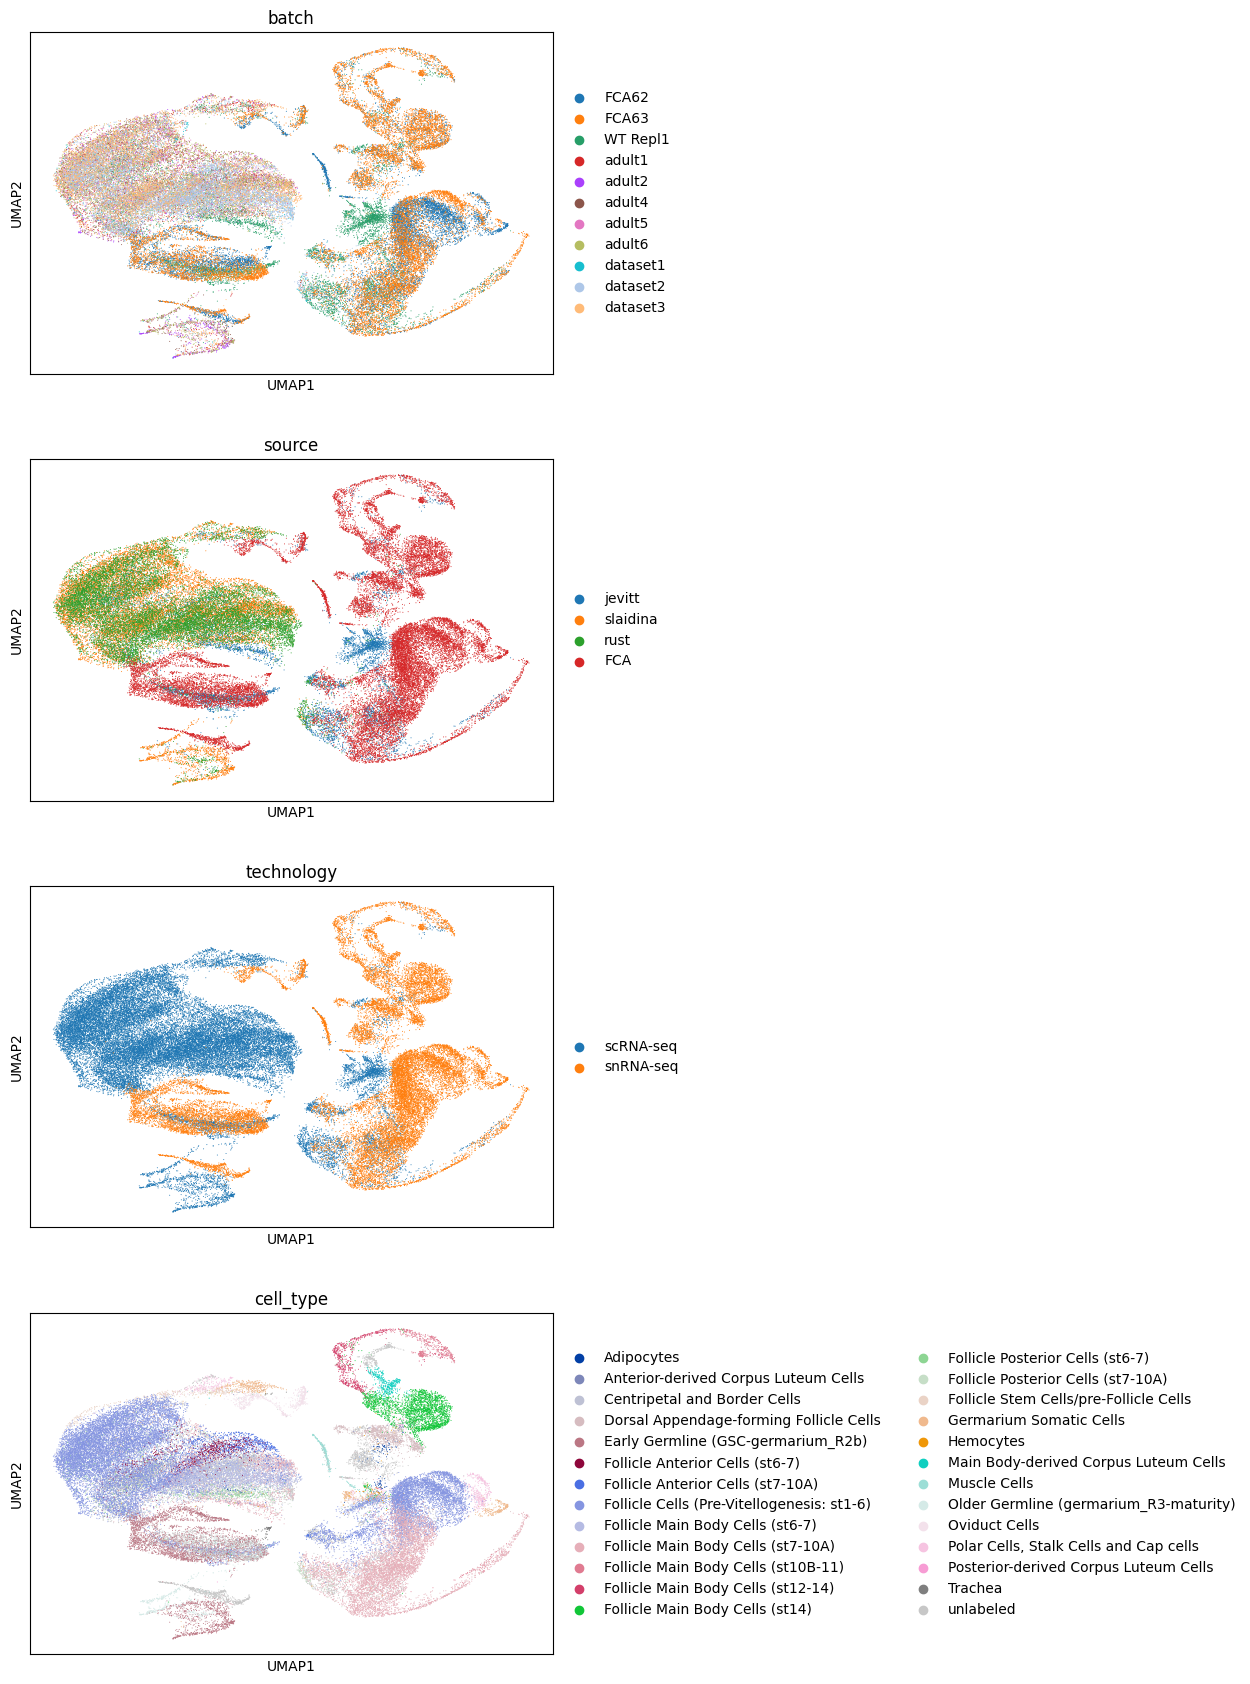

In [ ]:
harmony_integrate(
    adata_combined,
    key=['batch', 'source', 'technology'],  
    basis='X_pca',
    adjusted_basis='X_pca_harmony'
)



sc.pp.neighbors(adata_combined, use_rep='X_pca_harmony')
sc.tl.umap(adata_combined)
sc.pl.umap(adata_combined, color=['batch', 'source', 'technology', 'cell_type'], ncols=1)


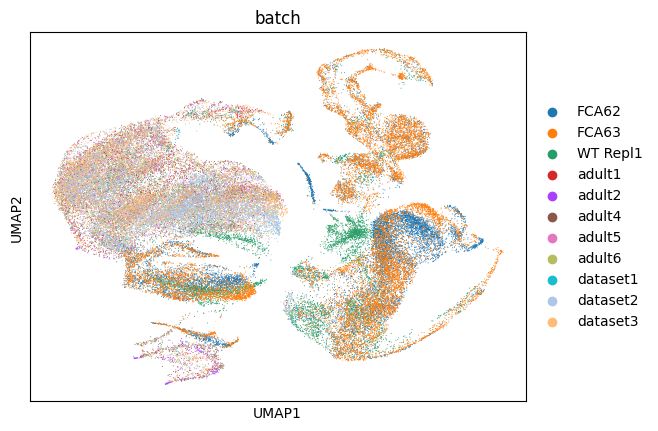

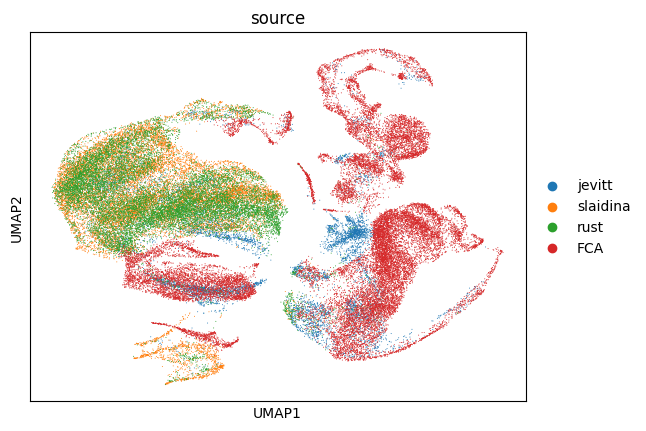

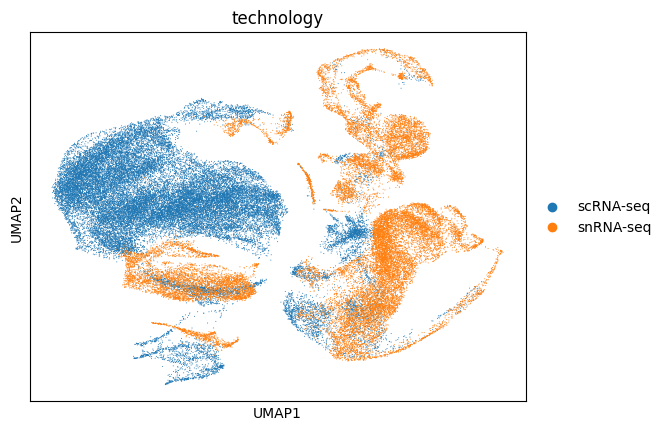

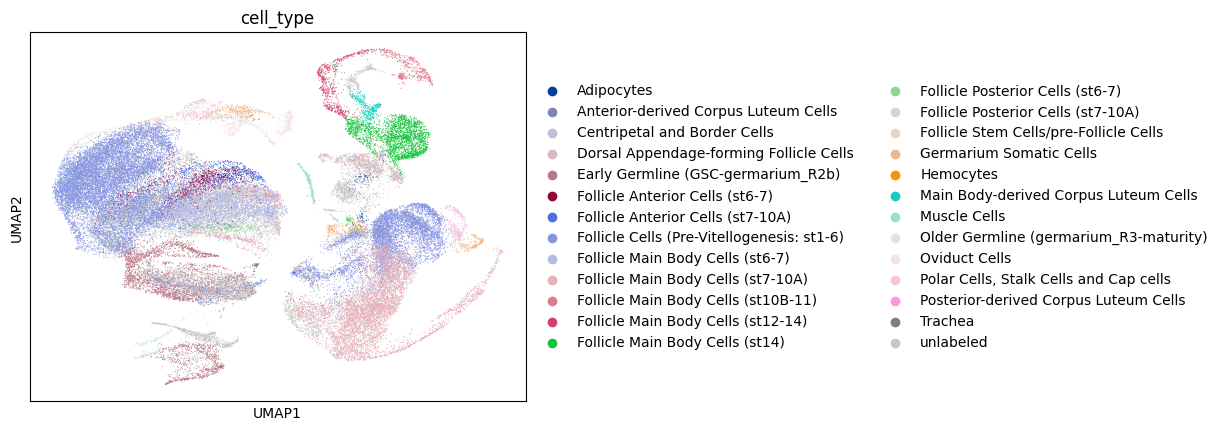

In [10]:
sc.pl.umap(adata_combined, color=['batch'])
sc.pl.umap(adata_combined, color=['source'], ncols=1)
sc.pl.umap(adata_combined, color=['technology'], ncols=1)
sc.pl.umap(adata_combined, color=['cell_type'], ncols=1)


#### scanvi

In [11]:
adata_combined
adata_combined.obs['n_counts'] = adata_combined.layers["counts"].sum(axis=1)

In [12]:
import scvi

scvi.settings.seed = 17
scvi.model.SCVI.setup_anndata(
    adata_combined,
    layer="counts",
    size_factor_key='n_counts',
    batch_key="batch",       
   # labels_key="cell_type",
   # unlabeled_category="unlabeled",
    categorical_covariate_keys = ["source", "technology"]
)

Seed set to 17


In [13]:
scvi.settings.seed = 17
model = scvi.model.SCVI(adata_combined, n_layers=2, n_latent=30, gene_likelihood="nb")

model.view_anndata_setup(adata_combined)

Seed set to 17


Anndata setup with scvi-tools version 1.2.2.post2.

Setup via `SCVI.setup_anndata` with arguments:

{
│   'layer': 'counts',
│   'batch_key': 'batch',
│   'labels_key': None,
│   'size_factor_key': 'n_counts',
│   'categorical_covariate_keys': ['source', 'technology'],
│   'continuous_covariate_keys': None
}

         Summary Statistics         
┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━┓
┃     Summary Stat Key     ┃ Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━┩
│         n_batch          │  11   │
│         n_cells          │ 60565 │
│ n_extra_categorical_covs │   2   │
│ n_extra_continuous_covs  │   0   │
│         n_labels         │   1   │
│          n_vars          │ 2000  │
└──────────────────────────┴───────┘

                             Data Registry                             
┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃      Registry Key      ┃            scvi-tools Location             ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│           X            │           adata.layers['counts']           │
│         batch          │          adata.obs['_scvi_batch']          │
│ extra_categorical_covs │ adata.obsm['_scvi_extra_categorical_covs'] │
│         labels         │         adata.obs['_scvi_labels']          │
│      size_factor       │           adata.obs['n_counts']            │
└────────────────────────┴────────────────────────────────────────────┘

                  batch State Registry                   
┏━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃  Source Location   ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['batch'] │   FCA62    │          0          │
│                    │   FCA63    │          1          │
│                    │  WT Repl1  │          2          │
│                    │   adult1   │          3          │
│                    │   adult2   │          4          │
│                    │   adult4   │          5          │
│                    │   adult5   │          6          │
│                    │   adult6   │          7          │
│                    │  dataset1  │          8          │
│                    │  dataset2  │          9          │
│                    │  dataset3  │         10          │
└────────────────────┴────────────┴─────────────────────┘

                     labels State Registry                      
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃      Source Location      ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│ adata.obs['_scvi_labels'] │     0      │          0          │
└───────────────────────────┴────────────┴─────────────────────┘

            extra_categorical_covs State Registry             
┏━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━┓
┃     Source Location     ┃ Categories ┃ scvi-tools Encoding ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━┩
│   adata.obs['source']   │   jevitt   │          0          │
│                         │  slaidina  │          1          │
│                         │    rust    │          2          │
│                         │    FCA     │          3          │
│                         │            │                     │
│ adata.obs['technology'] │ scRNA-seq  │          0          │
│                         │ snRNA-seq  │          1          │
│                         │            │                     │
└─────────────────────────┴────────────┴─────────────────────┘

In [14]:
scvi.settings.seed = 17
import torch_directml

dml_device = torch_directml.device()

model.to_device(dml_device)
model.module.to(dml_device)

model.device

model.train()

Seed set to 17
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\unite\miniconda3\envs\label_harmony\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 132/132: 100%|██████████| 132/132 [11:20<00:00,  5.94s/it, v_num=1, train_loss_step=814, train_loss_epoch=802]    

`Trainer.fit` stopped: `max_epochs=132` reached.


Epoch 132/132: 100%|██████████| 132/132 [11:20<00:00,  5.15s/it, v_num=1, train_loss_step=814, train_loss_epoch=802]


In [ ]:
model.save(".\\tese\\models\\scvi_05")

In [ ]:
model= scvi.model.SCVI.load(".\\tese\\models\\scvi_05", adata = adata_combined)

INFO     File C:\Users\unite\Documents\tese\home\rusty_lizard\tese\models\scvi_05_05\model.pt already downloaded   


In [ ]:
SCVI_LATENT_KEY = "X_scVI"
adata_combined.obsm[SCVI_LATENT_KEY] = model.get_latent_representation()

sc.pp.neighbors(adata_combined, use_rep=SCVI_LATENT_KEY)

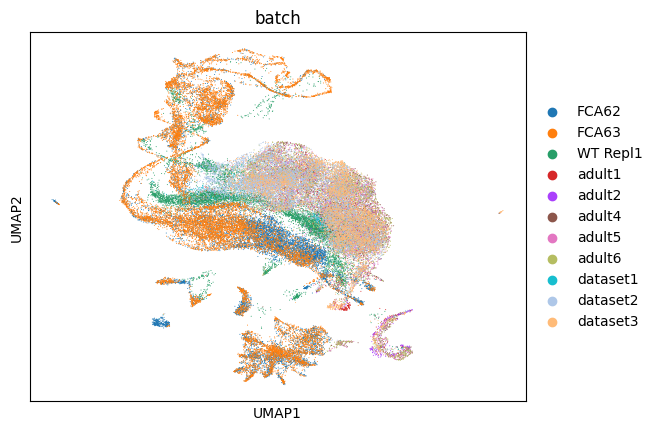

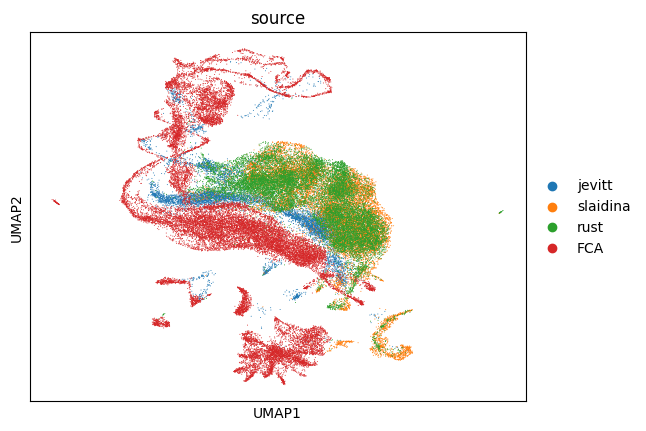

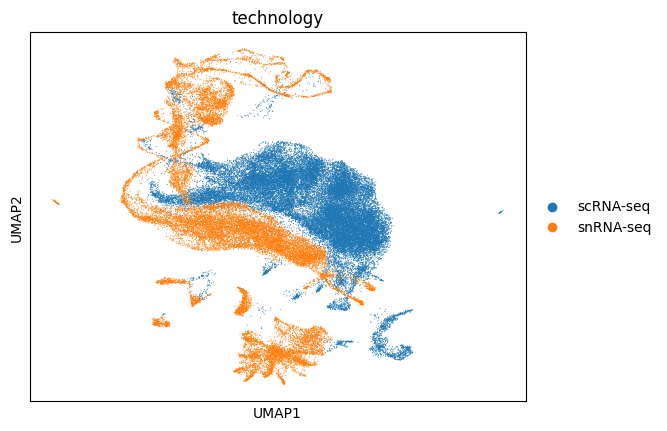

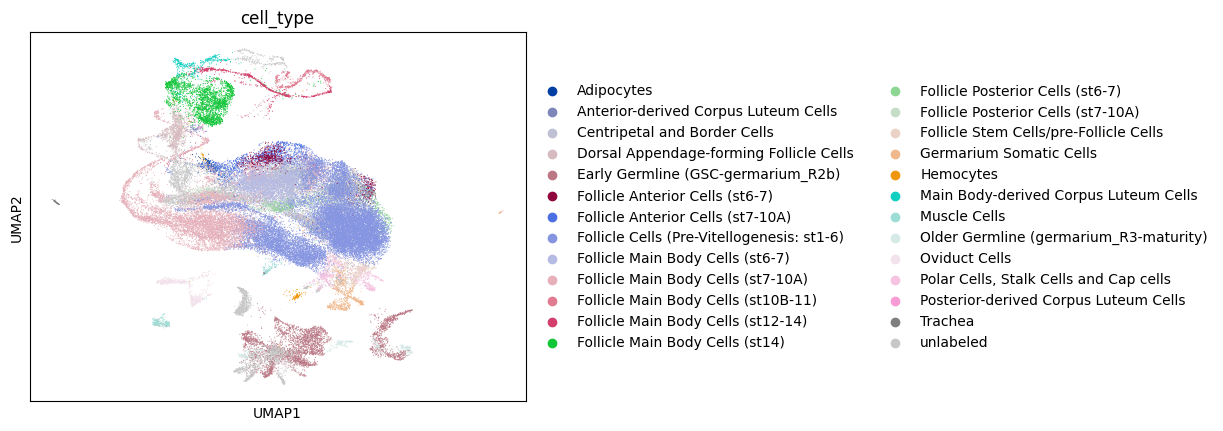

In [16]:
sc.tl.umap(adata_combined)

sc.pl.umap(adata_combined, color=['batch'])
sc.pl.umap(adata_combined, color=['source'], ncols=1)
sc.pl.umap(adata_combined, color=['technology'], ncols=1)
sc.pl.umap(adata_combined, color=['cell_type'], ncols=1)


In [46]:
scanvi_model = scvi.model.SCANVI.from_scvi_model(
    model,
    adata=adata_combined,
    labels_key="cell_type",
    unlabeled_category="unlabeled",
)

scanvi_model.train(max_epochs=20, n_samples_per_label=100)

INFO     Received view of anndata, making copy.                                                                    
INFO     Input AnnData not setup with scvi-tools. attempting to transfer AnnData setup                             
INFO     Training for 20 epochs.                                                                                   


GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\unite\miniconda3\envs\label_harmony\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Epoch 20/20: 100%|██████████| 20/20 [03:50<00:00, 11.61s/it, v_num=1, train_loss_step=784, train_loss_epoch=789]

`Trainer.fit` stopped: `max_epochs=20` reached.


Epoch 20/20: 100%|██████████| 20/20 [03:50<00:00, 11.55s/it, v_num=1, train_loss_step=784, train_loss_epoch=789]


In [47]:
SCANVI_LATENT_KEY = "X_scANVI"
adata_combined.obsm[SCANVI_LATENT_KEY] = scanvi_model.get_latent_representation(adata_combined)

sc.pp.neighbors(adata_combined, use_rep=SCANVI_LATENT_KEY)
sc.tl.umap(adata_combined)

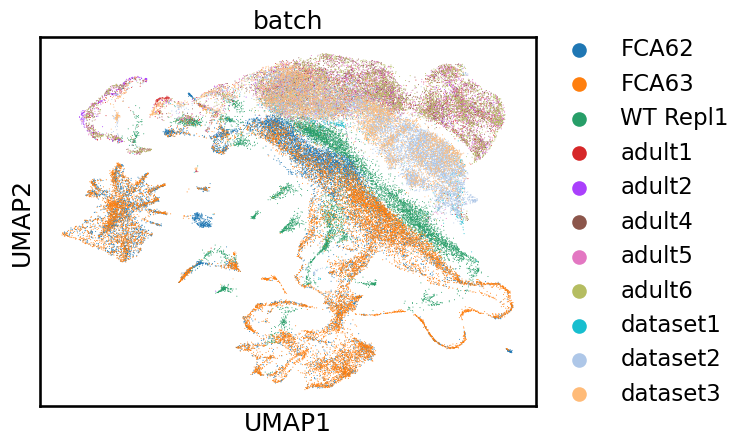

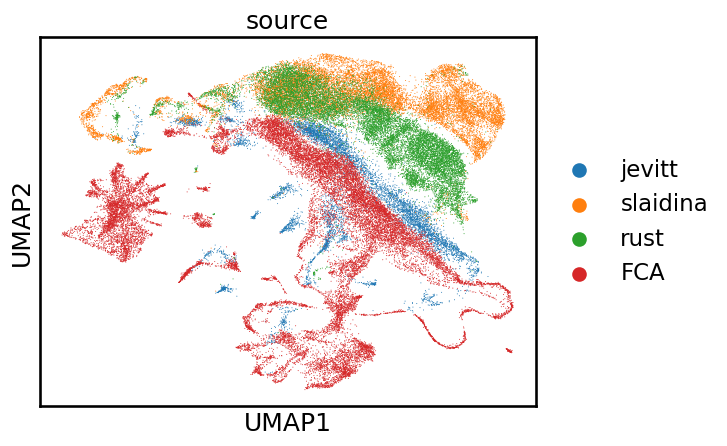

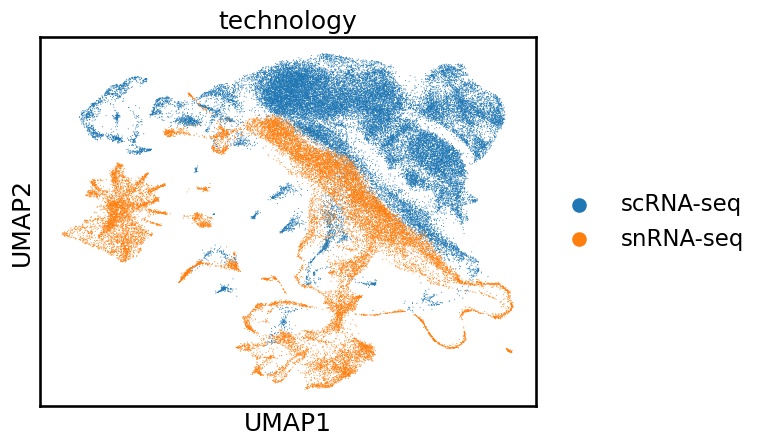

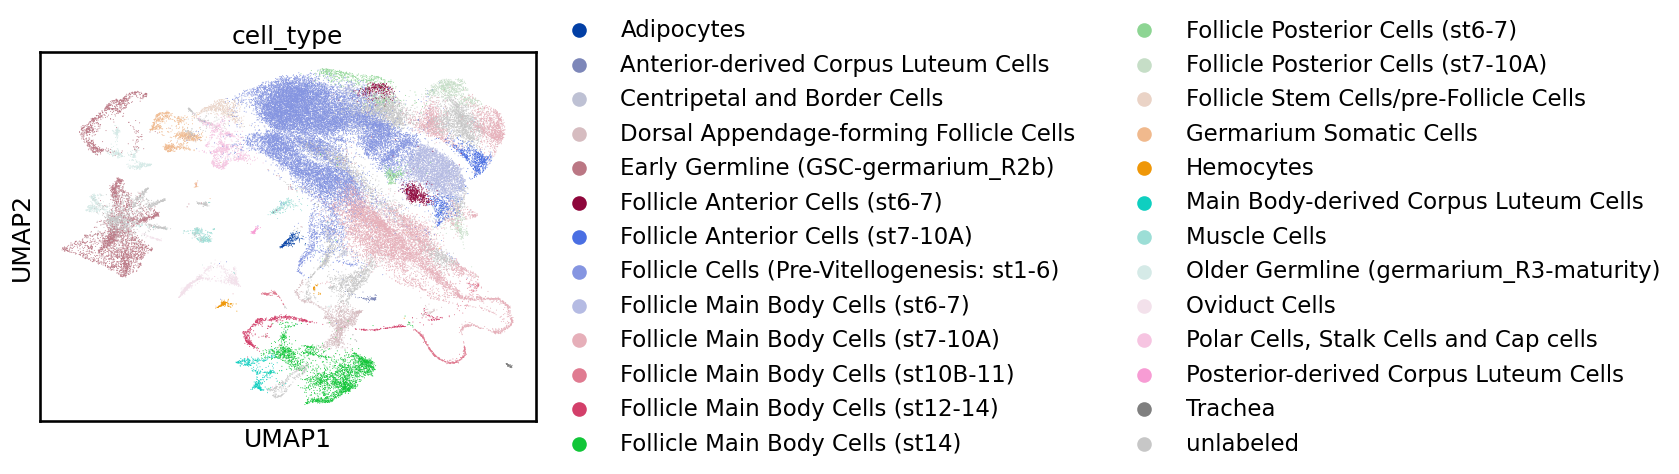

In [ ]:
sc.pl.umap(adata_combined, color=['batch'])
sc.pl.umap(adata_combined, color=['source'], ncols=1)
sc.pl.umap(adata_combined, color=['technology'], ncols=1)
sc.pl.umap(adata_combined, color=['cell_type'], ncols=1)


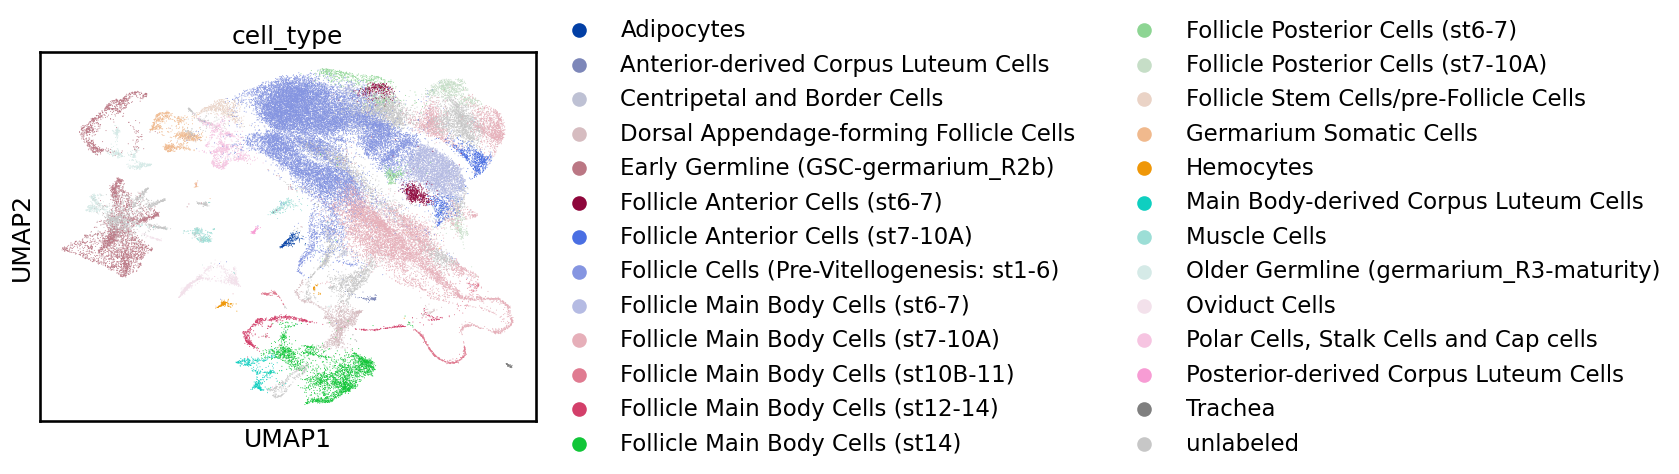

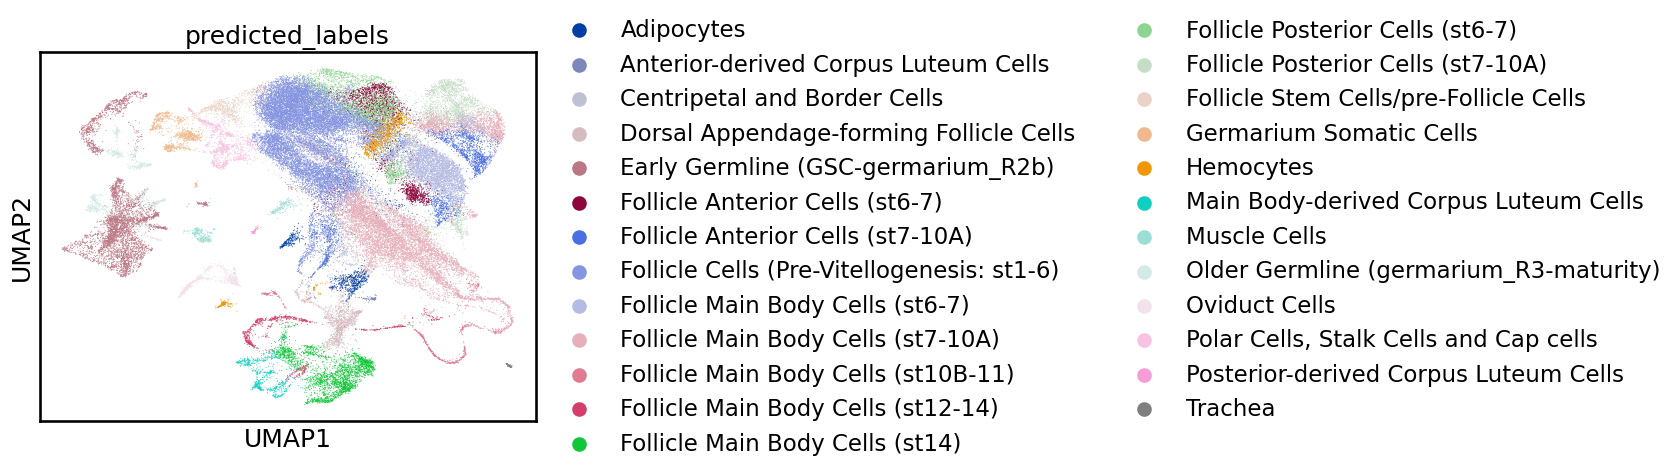

In [51]:
adata_combined.obs["predicted_labels"] = scanvi_model.predict(adata_combined)
sc.pl.umap(adata_combined, color=['cell_type'], ncols=1)
sc.pl.umap(adata_combined, color=['predicted_labels'], ncols=1)

C:\Users\unite\AppData\Local\Temp\ipykernel_23316\3781879739.py:9: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

C:\Users\unite\AppData\Local\Temp\ipykernel_23316\3781879739.py:23: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



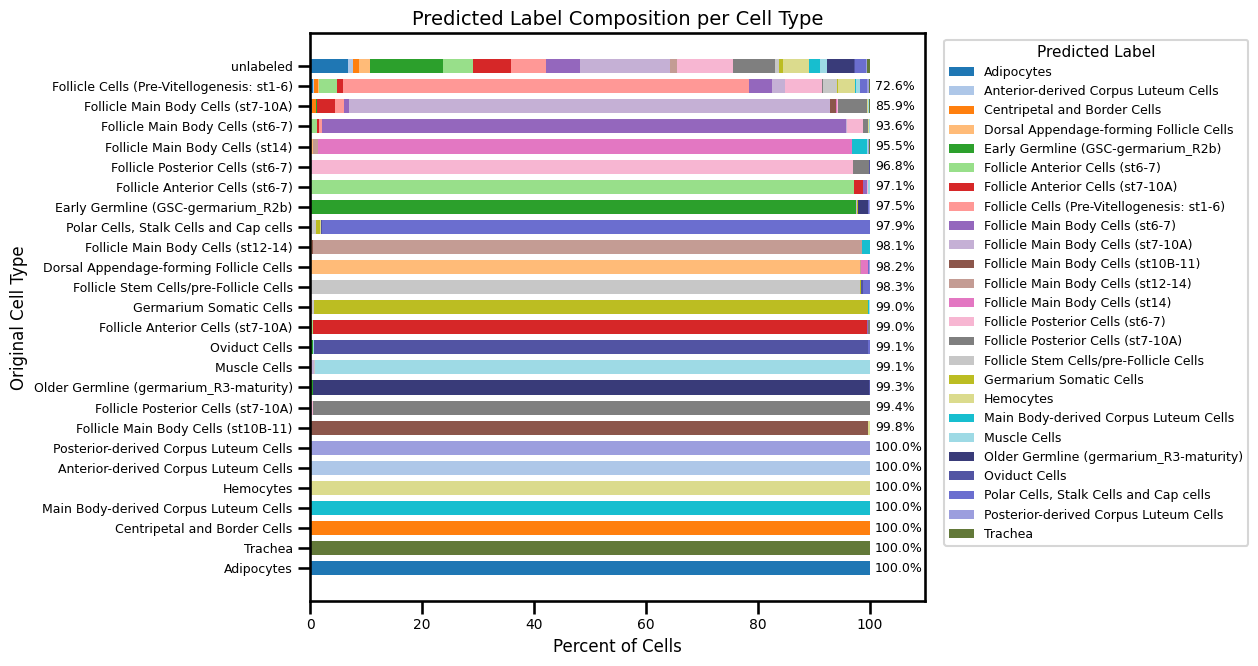

In [ ]:
from itertools import cycle
import matplotlib.pyplot as plt
import matplotlib.cm as cm

grouped = (
    adata_combined.obs
    .groupby(['cell_type', 'predicted_labels'])
    .size()
    .reset_index(name='count')
)


pivot = grouped.pivot(index='cell_type', columns='predicted_labels', values='count').fillna(0)
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100


row_order = pivot_percent.max(axis=1).sort_values(ascending=False).index
pivot_percent = pivot_percent.loc[row_order]


color_list = list(cm.get_cmap('tab20').colors) + list(cm.get_cmap('tab20b').colors) + list(cm.get_cmap('tab20c').colors)
predicted_labels = pivot_percent.columns.tolist()
label_colors = dict(zip(predicted_labels, cycle(color_list)))

fig, ax = plt.subplots(figsize=(13, 7))

bottoms = pd.Series([0] * len(pivot_percent), index=pivot_percent.index)
for label in predicted_labels:
    values = pivot_percent[label]
    ax.barh(pivot_percent.index, values, left=bottoms, label=label, color=label_colors[label], height=0.7)
    bottoms += values


max_percents = pivot_percent.max(axis=1)
for i, (label, pct) in enumerate(zip(pivot_percent.index, max_percents)):
    if label.lower() == "unlabeled":
        continue
    ax.text(101, i, f"{pct:.1f}%", va='center', ha='left', fontsize=9, color='black')




ax.set_title("Predicted Label Composition per Cell Type", fontsize=14)
ax.set_xlabel("Percent of Cells", fontsize=12)
ax.set_ylabel("Original Cell Type", fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=9)
ax.set_xlim(0, 110)


ax.legend(
    title='Predicted Label',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize=9,
    title_fontsize=11,
    ncol=1
)

plt.tight_layout()
plt.show()


In [ ]:
unlabeled_mask = adata_combined.obs['cell_type'] == "unlabeled"

import pandas as pd
import scanpy as sc

datasets = [
    (adata_jevitt, "ClusterName"),
    (adata_slaidina, "label"),
    (adata_rust, "label"),
    (adata_FCA, "label")
]

unlabeled_mask = adata_combined.obs['cell_type'] == "unlabeled"
unlabeled_cells = adata_combined[unlabeled_mask]

records = []

for source_adata, label_col in datasets:
    common_barcodes = unlabeled_cells.obs_names.intersection(source_adata.obs_names)
    for barcode in common_barcodes:
        original_label = source_adata.obs.loc[barcode, label_col]
        predicted_label = adata_combined.obs.loc[barcode, 'predicted_labels']
        records.append({
            'barcode': barcode,
            'original_label': original_label,
            'predicted_label': predicted_label
        })

unlabeled_df = pd.DataFrame(records)
unlabeled_df['source_dataset'] = unlabeled_df['barcode'].map(adata_combined.obs['source'])

source_summary = (
    unlabeled_df
    .groupby(['original_label', 'source_dataset'])
    .size()
    .reset_index(name='count')
    .sort_values(by='count', ascending=False))
print(unlabeled_df.head())


def clean_label(label):
    label = str(label).strip()
    
    if "??" in label or "?" in label:
        label = label.replace("??", "").replace("?", "").strip()
        label += " (uncertain)"
    
    label = label.replace("FCA_", "").replace("CSantos_", "")
    
    return label

unlabeled_df['original_label'] = unlabeled_df['original_label'].apply(clean_label)
unlabeled_df['predicted_label'] = unlabeled_df['predicted_label'].apply(clean_label)


            barcode                             original_label  \
0  TTGACTTGTCTCCACT  8. Post-Mitotic Follicle Cells (Stg. 6-8)   
1  AGCGGTCCAGGCGATA  8. Post-Mitotic Follicle Cells (Stg. 6-8)   
2  TAGACCAAGTGCTGCC  8. Post-Mitotic Follicle Cells (Stg. 6-8)   
3  TTCTACAAGGACGAAA  8. Post-Mitotic Follicle Cells (Stg. 6-8)   
4  TTGAACGTCACCTTAT  8. Post-Mitotic Follicle Cells (Stg. 6-8)   

                              predicted_label source_dataset  
0        Anterior-derived Corpus Luteum Cells         jevitt  
1          Follicle Main Body Cells (st7-10A)         jevitt  
2  Follicle Cells (Pre-Vitellogenesis: st1-6)         jevitt  
3  Follicle Cells (Pre-Vitellogenesis: st1-6)         jevitt  
4  Follicle Cells (Pre-Vitellogenesis: st1-6)         jevitt  


C:\Users\unite\AppData\Local\Temp\ipykernel_23316\3961326370.py:38: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



C:\Users\unite\AppData\Local\Temp\ipykernel_23316\3988062136.py:23: MatplotlibDeprecationWarning:

The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.



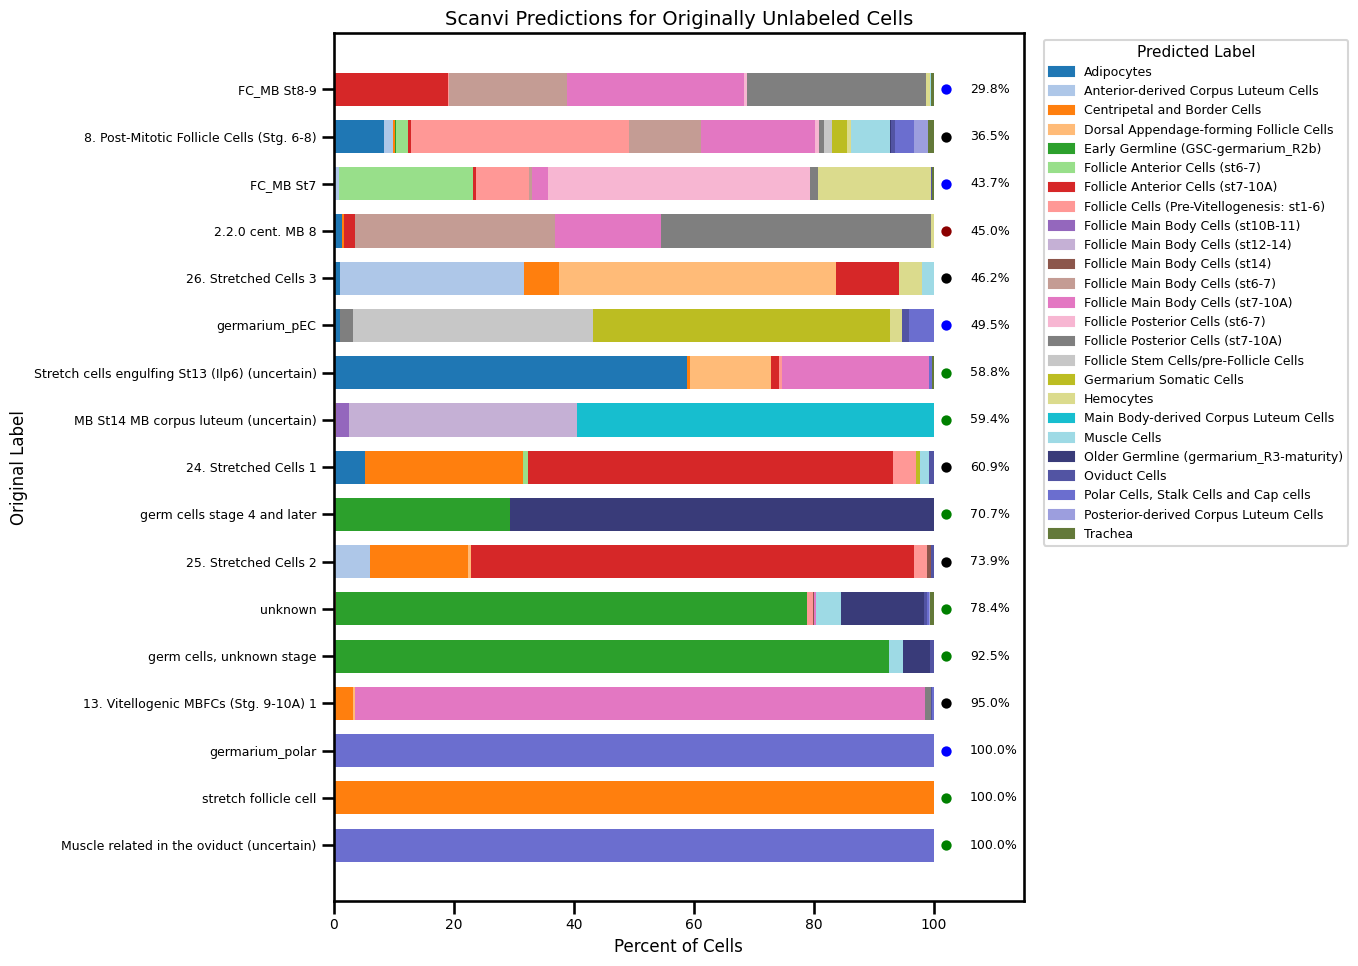

In [ ]:
from itertools import cycle
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd

grouped = (
    unlabeled_df
    .groupby(['original_label', 'predicted_label'])
    .size()
    .reset_index(name='count')
)

pivot = grouped.pivot(index='original_label', columns='predicted_label', values='count').fillna(0)
pivot_percent = pivot.div(pivot.sum(axis=1), axis=0) * 100

row_order = pivot_percent.max(axis=1).sort_values(ascending=False).index
pivot_percent = pivot_percent.loc[row_order]

color_list = list(cm.get_cmap('tab20').colors) + list(cm.get_cmap('tab20b').colors) + list(cm.get_cmap('tab20c').colors)
predicted_labels = pivot_percent.columns.tolist()
label_colors = dict(zip(predicted_labels, cycle(color_list)))

source_colors = {
    'jevitt': 'black',
    'rust': 'darkred',
    'slaidina': 'blue',
    'fca': 'green'
}
label_to_source = (
    unlabeled_df.drop_duplicates(subset='original_label')
    .set_index('original_label')['source_dataset']
    .str.lower()
)
dot_colors = pivot_percent.index.map(lambda label: source_colors.get(label_to_source.get(label, 'unknown'), 'gray'))

fig, ax = plt.subplots(figsize=(14, 10))

bottoms = pd.Series([0] * len(pivot_percent), index=pivot_percent.index)
for label in predicted_labels:
    values = pivot_percent[label]
    ax.barh(pivot_percent.index, values, left=bottoms, label=label, color=label_colors[label], height=0.7)
    bottoms += values

max_percents = pivot_percent.max(axis=1)
for i, (label, pct) in enumerate(zip(pivot_percent.index, max_percents)):
    ax.scatter(102, i, color=dot_colors[i], s=35, marker='o', zorder=3)
    if label.lower() != "unlabeled":
        ax.text(106, i, f"{pct:.1f}%", va='center', ha='left', fontsize=9, color='black')

ax.set_xlim(0, 115)
ax.set_title("Scanvi Predictions for Originally Unlabeled Cells", fontsize=14)
ax.set_xlabel("Percent of Cells", fontsize=12)
ax.set_ylabel("Original Label", fontsize=12)
ax.tick_params(axis='x', labelsize=10)
ax.tick_params(axis='y', labelsize=9)

handles = [plt.Rectangle((0,0),1,1, color=label_colors[l]) for l in predicted_labels]
ax.legend(
    handles=handles,
    labels=predicted_labels,
    title='Predicted Label',
    bbox_to_anchor=(1.02, 1),
    loc='upper left',
    fontsize=9,
    title_fontsize=11
)

plt.tight_layout()
plt.show()

In [ ]:
scanvi_model.save(".\\tese\\models\\scanvi_05")

In [22]:
import scib
import scib_metrics
from scib_metrics.benchmark import Benchmarker, BioConservation, BatchCorrection

In [151]:
import time

sc.pp.pca(adata_combined)


biocons = BioConservation(isolated_labels=False)

bm = Benchmarker(
    adata_combined,
    batch_key="batch",
    label_key="cell_type",
    embedding_obsm_keys=["X_pca", "X_pca_harmony", SCVI_LATENT_KEY, SCANVI_LATENT_KEY],
    bio_conservation_metrics=biocons,
    batch_correction_metrics=BatchCorrection(),
    n_jobs=-1,
)
bm.benchmark()


c:\Users\unite\miniconda3\envs\label_harmony\Lib\site-packages\scanpy\preprocessing\_pca.py:374: FutureWarning:

Argument `use_highly_variable` is deprecated, consider using the mask argument. Use_highly_variable=True can be called through mask_var="highly_variable". Use_highly_variable=False can be called through mask_var=None

Embeddings:   0%|          | 0/4 [00:00<?, ?it/s]

INFO     Adipocytes consists of a single batch or is too small. Skip.                                              
INFO     Anterior-derived Corpus Luteum Cells consists of a single batch or is too small. Skip.                    
INFO     Posterior-derived Corpus Luteum Cells consists of a single batch or is too small. Skip.                   


c:\Users\unite\miniconda3\envs\label_harmony\Lib\site-packages\scib_metrics\metrics\_graph_connectivity.py:32: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.

Embeddings:  25%|██▌       | 1/4 [01:42<05:07, 102.33s/it]

INFO     Adipocytes consists of a single batch or is too small. Skip.                                              
INFO     Anterior-derived Corpus Luteum Cells consists of a single batch or is too small. Skip.                    
INFO     Posterior-derived Corpus Luteum Cells consists of a single batch or is too small. Skip.                   


c:\Users\unite\miniconda3\envs\label_harmony\Lib\site-packages\scib_metrics\metrics\_graph_connectivity.py:32: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.

Embeddings:  50%|█████     | 2/4 [03:24<03:24, 102.00s/it]

INFO     Adipocytes consists of a single batch or is too small. Skip.                                              
INFO     Anterior-derived Corpus Luteum Cells consists of a single batch or is too small. Skip.                    
INFO     Posterior-derived Corpus Luteum Cells consists of a single batch or is too small. Skip.                   


c:\Users\unite\miniconda3\envs\label_harmony\Lib\site-packages\scib_metrics\metrics\_graph_connectivity.py:32: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.

Embeddings:  75%|███████▌  | 3/4 [04:01<01:12, 72.72s/it] 

INFO     Adipocytes consists of a single batch or is too small. Skip.                                              
INFO     Anterior-derived Corpus Luteum Cells consists of a single batch or is too small. Skip.                    
INFO     Posterior-derived Corpus Luteum Cells consists of a single batch or is too small. Skip.                   


c:\Users\unite\miniconda3\envs\label_harmony\Lib\site-packages\scib_metrics\metrics\_graph_connectivity.py:32: FutureWarning:

pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.

Embeddings: 100%|██████████| 4/4 [04:38<00:00, 69.74s/it]


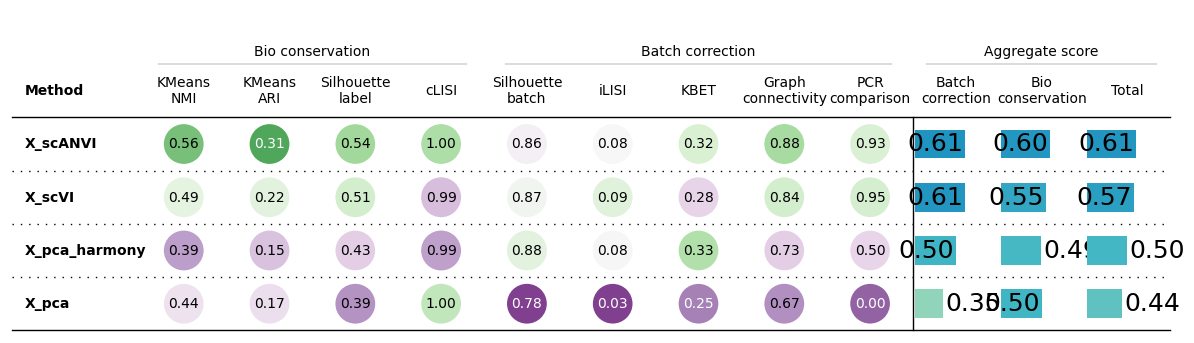

In [152]:
bm.plot_results_table(min_max_scale=False)

#### own dataset prediction

In [ ]:
query_adata = sc.read_h5ad('latest_adata.h5ad')  

query_adata.X = query_adata.layers["counts"]

query_adata.obs["batch"] = "10G"
query_adata.obs["technology"] = "snRNA-seq"
query_adata.obs["source"] = "CSlab"

common_genes = list(set(scanvi_model.adata.var_names) & set(query_adata.var_names))
print(f"Number of shared genes: {len(common_genes)} / {len(scanvi_model.adata.var_names)}")

if "PCs" in query_adata.varm:
     del query_adata.varm["PCs"]


scvi.model.SCANVI.prepare_query_anndata(query_adata, scanvi_model)

Number of shared genes: 1582 / 2000
INFO     Found 79.10000000000001% reference vars in query data.                                                    


c:\Users\unite\miniconda3\envs\label_harmony\Lib\site-packages\scvi\model\base\_archesmixin.py:211: UserWarning:

Query data contains less than 80% of reference var names. This may result in poor performance.



In [169]:
query_adata

AnnData object with n_obs × n_vars = 15010 × 2000
    obs: 'Barcode', 'decontX_contamination', 'decontX_clusters', 'sizeFactor', 'sum', 'detected', 'subsets_Mito_sum', 'subsets_Mito_detected', 'subsets_Mito_percent', 'total', 'scDblFinder.class', 'scDblFinder.score', 'scDblFinder.weighted', 'scDblFinder.cxds_score', 'n_counts', 'leiden_0_1', 'leiden_0_5', 'leiden_1_0', 'leiden_1_5', 'leiden_2_0', 'leiden_5_0', 'batch', 'technology', 'source', '_scvi_batch', 'cell_type', '_scvi_labels', 'predicted_label'
    var: 'ID', 'Symbol', 'scDblFinder.selected', 'highly_variable', 'highly_variable_rank', 'means', 'variances', 'variances_norm'
    uns: '_scvi_uuid', '_scvi_manager_uuid', 'neighbors', 'umap', 'predicted_label_colors'
    obsm: 'X_decontx_umap', 'X_pca', 'X_umap', '_scvi_extra_categorical_covs', 'X_scANVI'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [165]:
#fine tuning

new_model = scvi.model.SCANVI.load_query_data(query_adata, scanvi_model)
new_model.train(max_epochs=50)

INFO     Training for 50 epochs.                                                                                   


c:\Users\unite\miniconda3\envs\label_harmony\Lib\site-packages\scvi\data\_manager.py:220: UserWarning:

Missing labels key cell_type. Filling in with unlabeled category unlabeled.

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
c:\Users\unite\miniconda3\envs\label_harmony\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:425: PossibleUserWarning:

The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.



Epoch 50/50: 100%|██████████| 50/50 [01:40<00:00,  2.01s/it, v_num=1, train_loss_step=852, train_loss_epoch=911]      

`Trainer.fit` stopped: `max_epochs=50` reached.


Epoch 50/50: 100%|██████████| 50/50 [01:40<00:00,  2.01s/it, v_num=1, train_loss_step=852, train_loss_epoch=911]


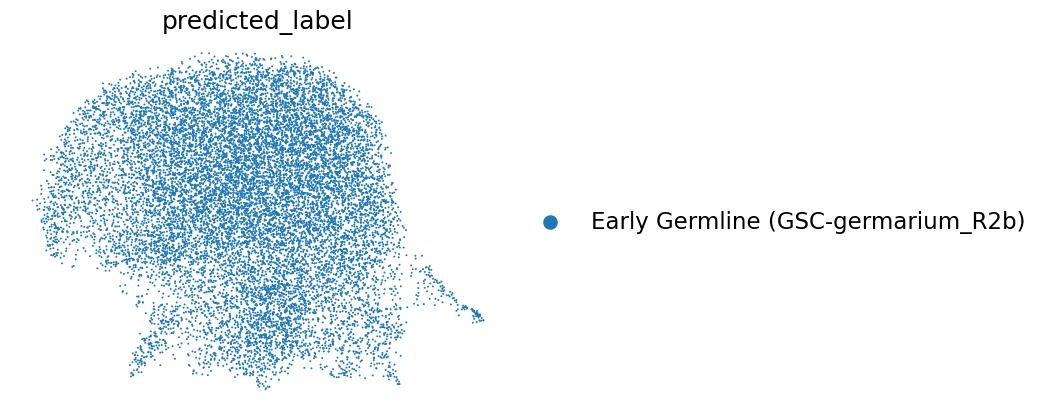

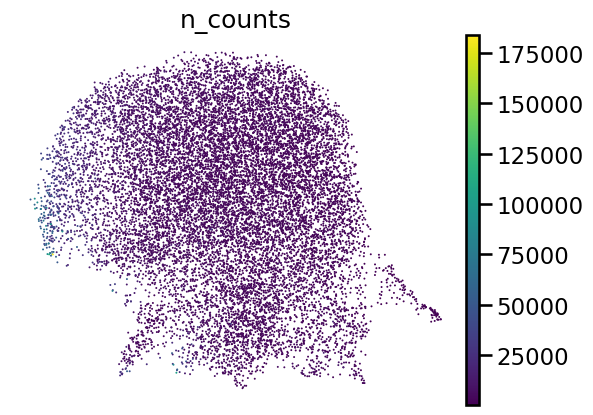

In [166]:
query_adata.obs["predicted_label"] = new_model.predict()

SCANVI_LATENT_KEY = "X_scANVI"
query_adata.obsm[SCANVI_LATENT_KEY] = new_model.get_latent_representation(query_adata)

sc.pp.neighbors(query_adata, use_rep=SCANVI_LATENT_KEY)
sc.tl.umap(query_adata)
sc.pl.umap(
    query_adata,
    color=["predicted_label"],
    frameon=False,
    ncols=1
)

sc.pl.umap(
    query_adata,
    color=["n_counts"],
    frameon=False,
    ncols=1
)

